# E-commerce site clients segmentation

# Content
- [Context of the problem](#Context-of-the-problem)
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Exploratory analysis and data cleaning](#Exploratory-analysis-and-data-cleaning)
- [Prediction analysis](#Prediction-analysis)

## Context of the problem

* Olist wants us to provide to their e-commerce teams information about customer segmentation that they can use for their daily communication campaigns.

* Our goal is to understand the different types of users through their behavior and personal data. We need to provide the marketing team an actionable description of the customer segmentation and the underlying logic for optimal use, as well as a maintenance contract proposal based on an analysis of segment stability over time.

* Olist provides an anonymized database containing information on order history, products purchased, satisfaction comments, and customer location since January 2017.

* The mission is to help Olist teams understand the different types of users. We will therefore use unsupervised methods to group customers with similar profiles. These categories can be used by the Marketing team to better communicate.

*  **Olist internal dashboards suggest that only 3% of customers in the data have made several orders. The data available will be sufficient to perform a first clustering.**

* The proposed segmentation must be easy to use by Olist Marketing team. It must be able to differentiate between good and less good customers in terms of orders and satisfaction. Olist expect segmentation on all customers as well.

* **Once the segmentation model has been chosen, Olist would like us to recommend how often the segmentation should be updated to remain relevant, in order to be able to quote a maintenance contract.**


This dataset was provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

See more on our website: https://olist.com/pt-br/

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention:
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

https://www.kaggle.com/olistbr/brazilian-ecommerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

The database is divided in multiple datasets for better understanding and organization.

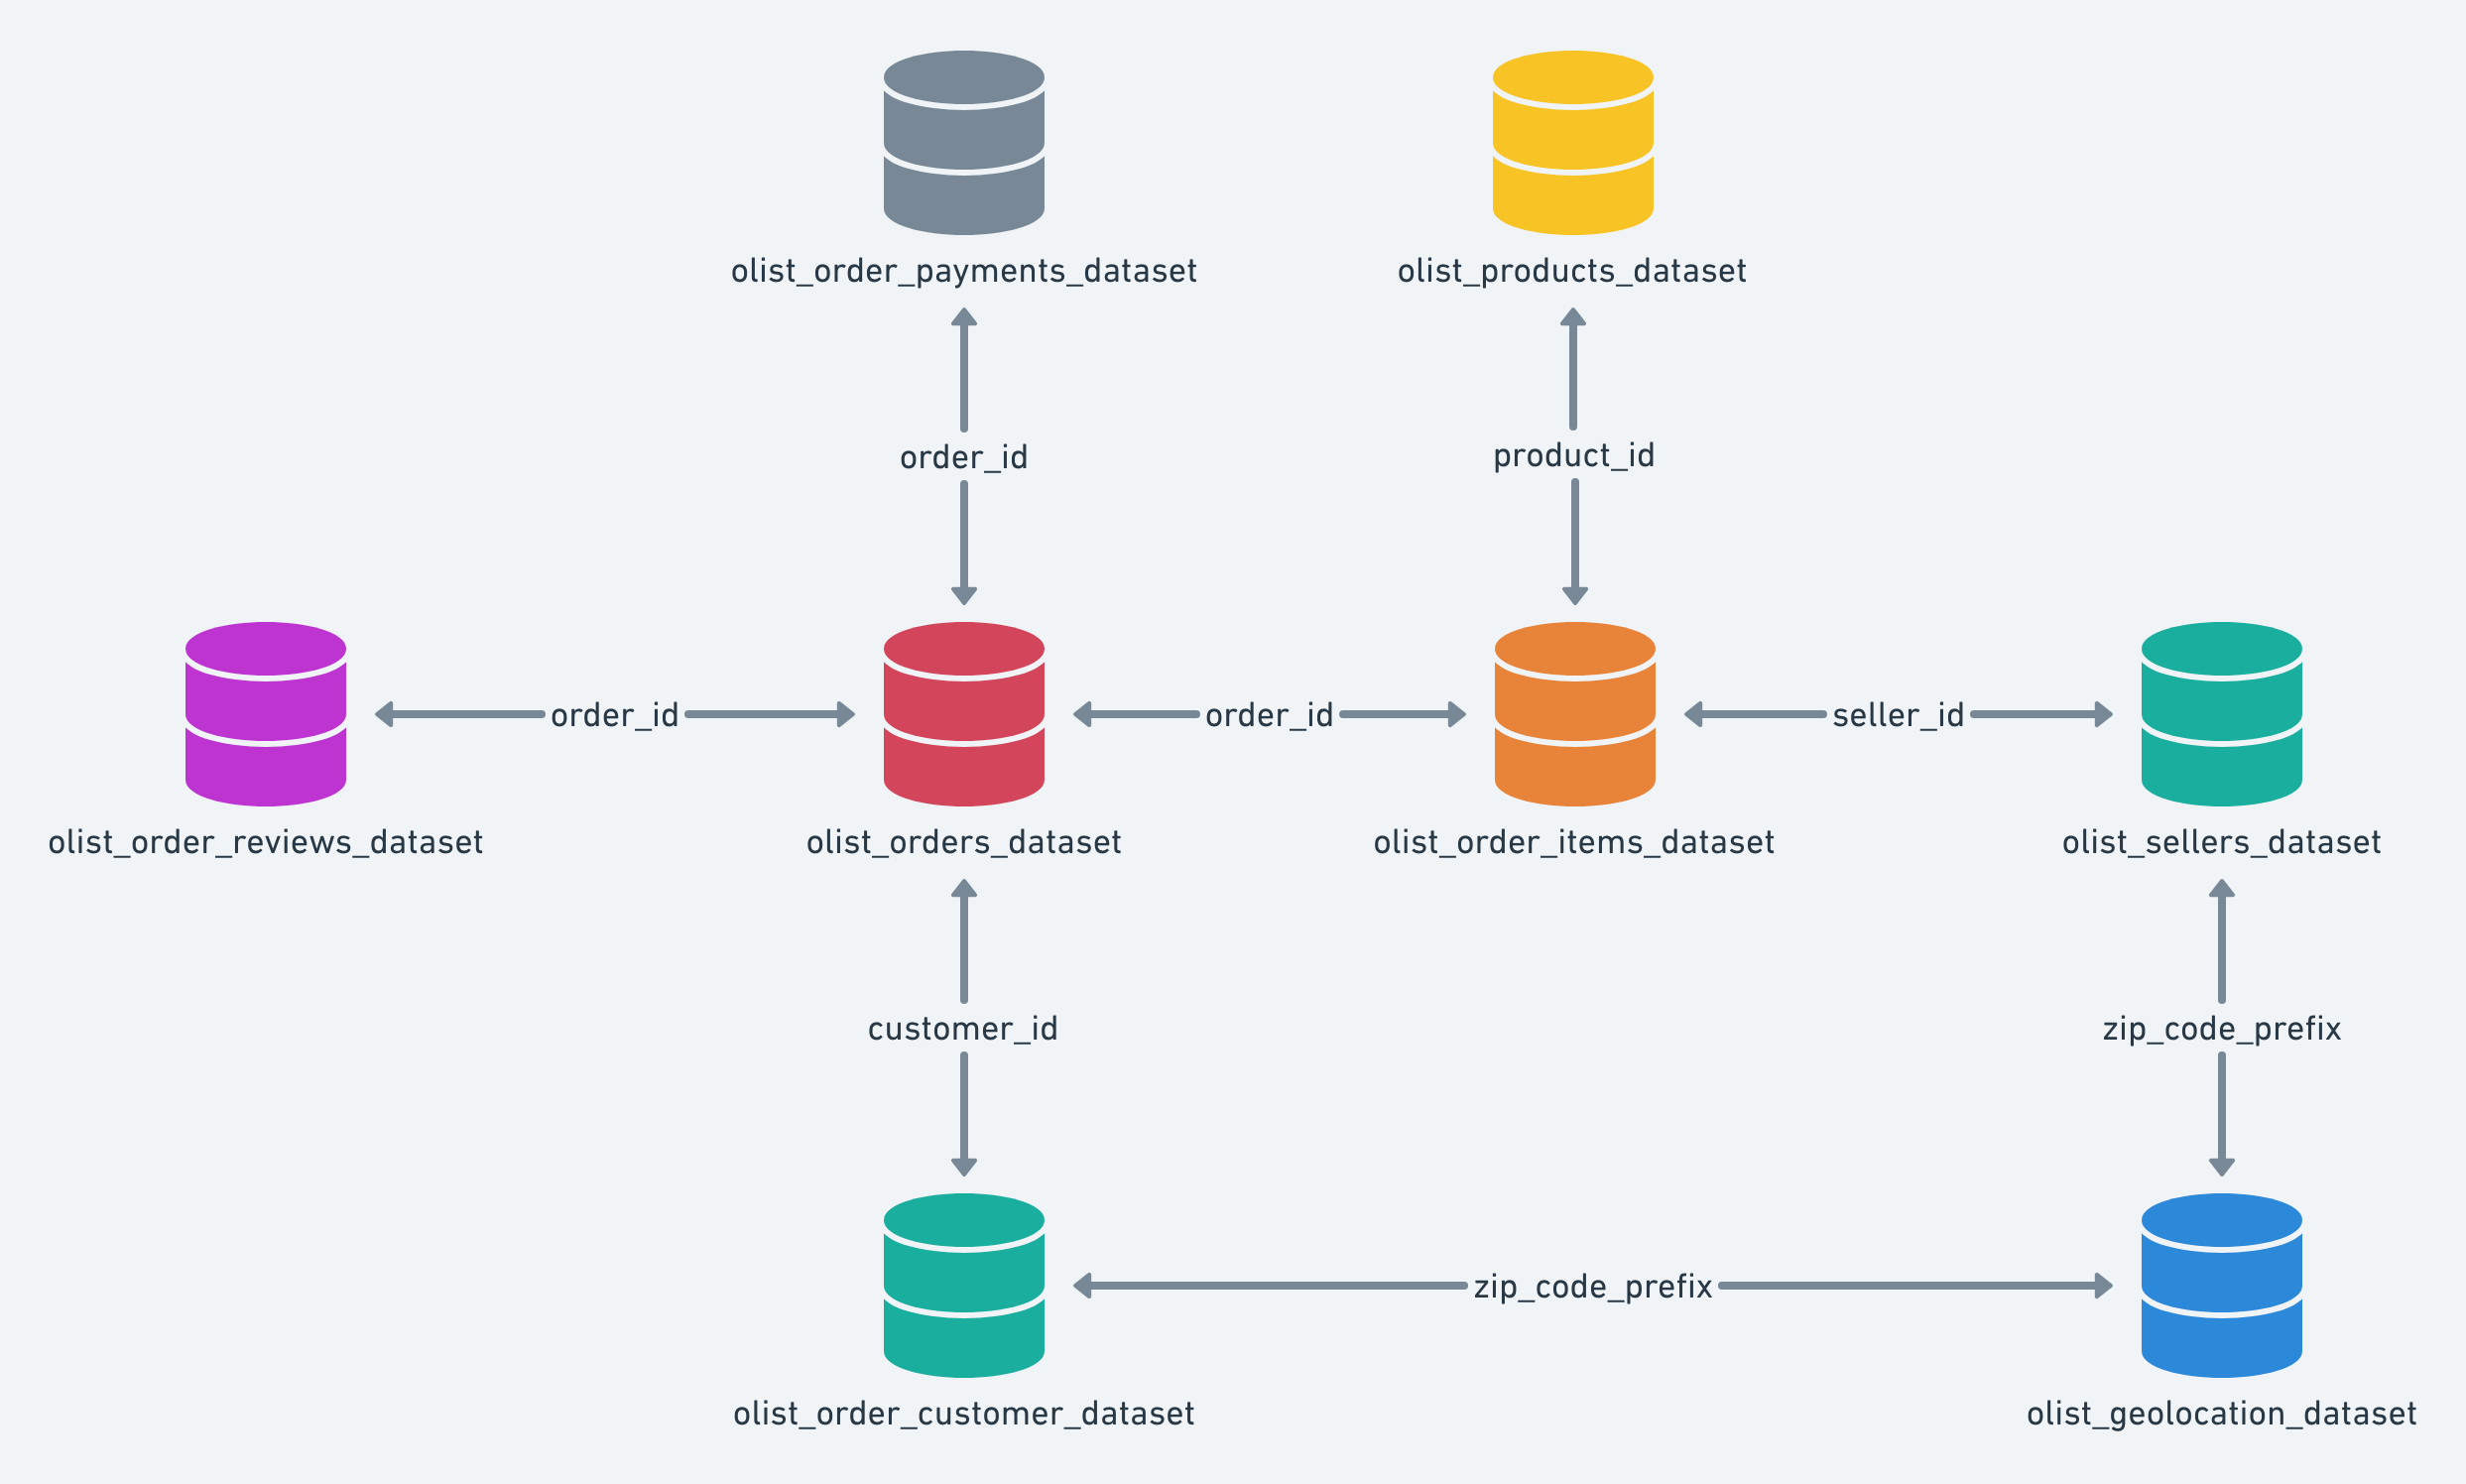

In [2]:
%matplotlib inline
from IPython.display import Image
Image('HRhd2Y0.png')

## Pre-exploratory stage: General analysis and discovery of the files

### Olist customer data file

In [3]:
olist_customers_df = pd.read_csv('olist_customers_dataset.csv')
olist_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The customers dataset contains:
* **customer_id:** key to the orders dataset. Each order has a unique customer_id.
* **customer_unique_id**: unique identifier of a customer.

It also contains information about the customer: 
* **zip code, city and state.**

### Olist geolocation data file

In [4]:
olist_geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
olist_geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


The geolocation dataset contains information about geographical coordinates of a determined city. This data dile does not contain information about the customer.

### Olist order items data file

In [5]:
olist_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The order items dataset contains information about orders, such as:
* The **order unique identifier**, 
* The **product unique identifier**, 
* The **seller unique identifier**, 
* The **shipping date**, 
* **price per item** and, 
* **freight value per item**. 

If an order has more than one item the freight value is splitted between items. 

The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same or different products). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

* The total order_item value is: 21.33 * 3 = 63.99

* The total freight value is: 15.10 * 3 = 45.30

* The total order value (freight + product) is: 45.30 + 63.99 = 109.29

See reference and data documentation: https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

The previously indicated can be useful for performing feature engineering.

The order item id is a sequential number that indicates the number of items included in the same order.

In [6]:
olist_order_items_df[olist_order_items_df['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [7]:
# olist_order_items_df[olist_order_items_df['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

### Olist order payments data file

In [8]:
olist_order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


The order payments dataset includes data about the orders payment options. It contains: 
* The **order unique identifier**,  
* The **payment method or type** chosen by the customer, 
* **payment sequential** indicates when a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments, 
* **payment or transaction value** and, 
* **payment installments** chosen by the customer.

### Olist order reviews data file

In [9]:
olist_order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
olist_order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


The order reviews dataset contains information about: 
* The **order unique identifier**, 
* **review unique identifier**, 
* **review score** which is a score ranging from 1 to 5 given by the customer on a satisfaction survey, 
* **review title and review comment** which is left by the customer in Portuguese, 
* **creation date** that shows the date in which the satisfaction survey was sent to the customer and, 
* the **review answer timestamp** that shows satisfaction survey answer timestamp.

### Olist orders data file

In [10]:
olist_orders_df = pd.read_csv('olist_orders_dataset.csv')
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


The orders dataset contains: 
* The **order unique identifier**, 
* the **customer unique identifier** that is the key to the customer dataset (each order has a unique customer identifier), 
* the **order status** (delivered, shipped, etc), 
* the **order purchase timestamp** that shows the purchase timestamp, 
* the **order approval timestamp** that shows the payment approval timestamp,
* the **order delivered carrier date** that shows the order posting timestamp. When it was handled to the logistic partner,
* the **order delivered customer date** that shows the actual order delivery date to the customer and,
* the **estimated delivery date of the order** that shows the estimated delivery date that was informed to customer at the purchase moment.

### Olist products data file

In [11]:
olist_products_df = pd.read_csv('olist_products_dataset.csv')
olist_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The product dataset contains information about the **product unique identifier** and product description.

### Olist sellers data file

In [12]:
olist_sellers_df = pd.read_csv('olist_sellers_dataset.csv')
olist_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


The sellers dataset contains the sellers information such as: 
* **seller unique id** and 
* **sellers geographical location**.

### Olist product category name translation in english data file

In [13]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


The products category dataset contains: 
* The **product category name** in portuguese and 
* **product category name translated** in english. 

### Number of columns, rows, and the number of missing values.

Part of the files discovery is their number of columns and rows, and the number of missing values.

In [14]:
list_data_files = [
            'olist_customers_dataset',
            'olist_geolocation_dataset',
            'olist_order_items_dataset', 
            'olist_order_payments_dataset',
            'olist_order_reviews_dataset',
            'olist_orders_dataset',
            'olist_products_dataset',
            'olist_sellers_dataset',
            'product_category_name_translation'
            ]

list_data_frames = [
            olist_customers_df,
            olist_geolocation_df,
            olist_order_items_df, 
            olist_order_payments_df,
            olist_order_reviews_df,
            olist_orders_df,
            olist_products_df,
            olist_sellers_df,
            product_category_name_translation_df
            ]
                    

In [15]:
for datafile, df in zip(list_data_files, list_data_frames):
    print("The {} file contains: {} rows and {} columns".format(datafile, df.shape[0], df.shape[1]))
    print("Missing or nan values of:\n{}".format(df.isna().sum(axis=0)))
 

The olist_customers_dataset file contains: 99441 rows and 5 columns
Missing or nan values of:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
The olist_geolocation_dataset file contains: 1000163 rows and 5 columns
Missing or nan values of:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
The olist_order_items_dataset file contains: 112650 rows and 7 columns
Missing or nan values of:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
The olist_order_payments_dataset file contains: 103886 rows and 5 columns
Missing or nan values of:
order_id                0
payment_sequential      0
payment_type            0
paym

## Exploratory analysis and data cleaning

#### Exploration of missing values

In order to better understand the quantity of missing values in some of the data files, we plot the percentage of them.

In [16]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')

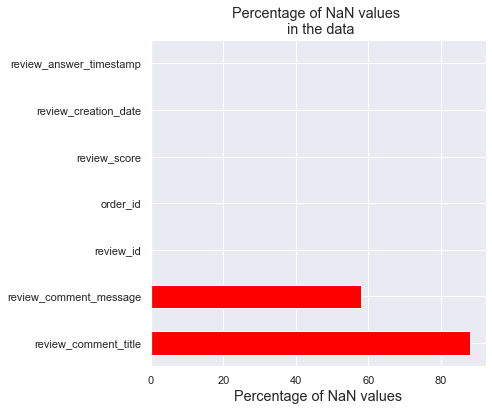

In [17]:
graph_nan_values_per_column(olist_order_reviews_df, (6,6))

From the previous graph we observe that there is more than 40% of missing values for two of the columns. We will eliminate from the data file these two columns.

In [18]:
olist_order_reviews_df = olist_order_reviews_df.drop(columns=['review_comment_message', 'review_comment_title'])

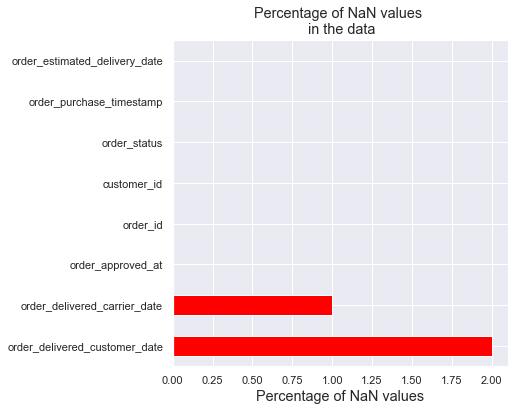

In [19]:
graph_nan_values_per_column(olist_orders_df, (6,6))

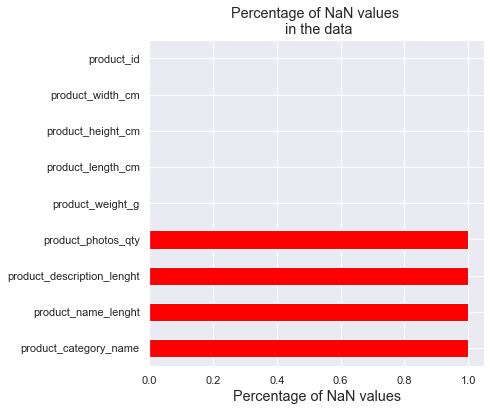

In [20]:
graph_nan_values_per_column(olist_products_df, (6,6))

The two data for Olist orders and products contain a very low percentage of missing values, so we will treat them after.

#### Feature engineering: creation of number of items of an order from the order items dataset

As pointed out before, since an order can have more than one item of the same product, we can perform some operations to obtain new variables. 

For example, the total freight value of an order is splitted between items, this is:

* The total_freight_value is: 15.10 * 3 = 45.30

We can also compute the total price of the order:

* The total_order_price_all_order_items is: 21.33 * 3 = 63.99

And the total order value can be calculated as:

* The total_order_value (total_freight_value + total_order_price_all_order_items) is: 45.30 + 63.99 = 109.29

We need also to obtain the number of items per order an add it as a column. 

In [21]:
olist_order_items_new_df =  olist_order_items_df.copy()

In [22]:
olist_order_items_new_df['count'] = olist_order_items_new_df.groupby('order_id')['order_id'].transform('count')

In [23]:
olist_order_items_new_df.rename(columns={"count":"order_total_number_of_items"},inplace=True)

In [24]:
olist_order_items_new_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_total_number_of_items
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


### Merge of the tables by keys

#### First merge

We will start by creating a new dataframe by performing a first merging of the Olist products dataset with the Olist order items dataset. We will do it by using the product_id key.

In [25]:
products_and_orders_items_df = pd.merge(olist_products_df, olist_order_items_new_df, on='product_id')

In [26]:
products_and_orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_id                   112650 non-null  object 
 1   product_category_name        111047 non-null  object 
 2   product_name_lenght          111047 non-null  float64
 3   product_description_lenght   111047 non-null  float64
 4   product_photos_qty           111047 non-null  float64
 5   product_weight_g             112632 non-null  float64
 6   product_length_cm            112632 non-null  float64
 7   product_height_cm            112632 non-null  float64
 8   product_width_cm             112632 non-null  float64
 9   order_id                     112650 non-null  object 
 10  order_item_id                112650 non-null  int64  
 11  seller_id                    112650 non-null  object 
 12  shipping_limit_date          112650 non-null  object 
 13 

We will eliminate some columns from the dataframe.

In [27]:
products_and_orders_items_df = products_and_orders_items_df.drop(columns=[ 
                                                                            'product_name_lenght',
                                                                            'product_description_lenght', 
                                                                            'product_photos_qty', 
                                                                            'product_weight_g', 
                                                                            'product_length_cm',
                                                                            'product_height_cm',
                                                                            'product_width_cm',
                                                                            'shipping_limit_date'])

We will verify if there are duplicate values for the product_id, order_id, order_item_id, seller_id keys.

In [28]:
print ("The number of duplicate values in the variable 'product_id' of the products and order items dataframe is: {}".format(products_and_orders_items_df.duplicated(subset=['product_id']).sum()))

The number of duplicate values in the variable 'product_id' of the products and order items dataframe is: 79699


In [29]:
print ("The number of duplicate values in the variable 'order_id' of the products and order items dataframe is: {}".format(products_and_orders_items_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the products and order items dataframe is: 13984


As we observed, there are duplicate values of product_id and order_id. This is because an order can have several products or items (denoted in order_item_id), and not necessarily the products are the same for an order. This is shown in the two following cells.

In [30]:
products_and_orders_items_df[products_and_orders_items_df['order_item_id'] > 5]

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,order_total_number_of_items
69,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,7,5058e8c1e82653974541e83690655b4a,79.99,13.73,7
1153,f2a1b32f85cad59ff2a8444154ac25f0,climatizacao,e332eda82fe7ca4e86daf4f71ca785df,6,fcdd820084f17e9982427971e4e9d47f,190.00,44.05,7
1154,f2a1b32f85cad59ff2a8444154ac25f0,climatizacao,e332eda82fe7ca4e86daf4f71ca785df,7,fcdd820084f17e9982427971e4e9d47f,190.00,44.05,7
1970,43267ceb81c34b7d49decd624671ccfa,ferramentas_jardim,d573cf2d2bd145e4bc855132a6c815af,6,cfa5ab0e4d3fc212fd0b3410e7081c62,155.99,4.40,6
3199,3fddda7e92c16fa45033a4373a116e00,perfumaria,7b1628af9aa95c57c63665fb81cced3b,6,11bfa66332777660bd0640ee84d47006,40.99,11.85,6
...,...,...,...,...,...,...,...,...
111660,ed1d57799b8b974641a1acb3fd994016,utilidades_domesticas,39f9559c0533f3ea56143c01bfdd7d9c,6,acf974e4d5950ad143a247471b831eb9,40.10,34.97,6
111728,adc48fd26eea311ca6856b58dfc3ca21,utilidades_domesticas,3f744e5030fb02e02651eb31d5204878,6,98dac6635aee4995d501a3972e047414,5.90,18.23,6
112037,b5c4b2c6b8c342b7740e46797bec3ef1,automotivo,7b186487147f406839316cb0a719d4b1,6,39a5005f2605cbdb4f9ac14485cabfd1,42.01,19.48,6
112444,b81a05d0dd312ece2140846909f5ef81,moveis_decoracao,57be20dc5f786ed372add8e3f28be447,6,5a8e7d5003a1f221f9e1d6e411de7c23,79.90,27.84,6


In [31]:
products_and_orders_items_df[products_and_orders_items_df['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,order_total_number_of_items
66,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,1,5058e8c1e82653974541e83690655b4a,79.99,13.73,7
67,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,3,5058e8c1e82653974541e83690655b4a,79.99,13.73,7
68,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,5,5058e8c1e82653974541e83690655b4a,79.99,13.73,7
69,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,7,5058e8c1e82653974541e83690655b4a,79.99,13.73,7
23190,8ed094bfe076c568f6bb10feada3f75d,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,2,7c67e1448b00f6e969d365cea6b010ab,179.90,133.85,7
23191,8ed094bfe076c568f6bb10feada3f75d,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,4,7c67e1448b00f6e969d365cea6b010ab,179.90,133.85,7
23192,8ed094bfe076c568f6bb10feada3f75d,moveis_escritorio,62073ec6b54b8e6322037fc0f3591ad3,6,7c67e1448b00f6e969d365cea6b010ab,179.90,133.85,7


#### Second merge

The second merge that we will perform is by creating a new dataframe of the customers and orders datasets by the customer_id key. We will verify if there are duplicate values for the customer_id key.

In [32]:
print ("The number of duplicate values in the variable 'customer_id' of the customers dataframe is: {}".format(olist_customers_df.duplicated(subset=['customer_id']).sum()))

The number of duplicate values in the variable 'customer_id' of the customers dataframe is: 0


In [33]:
print ("The number of duplicate values in the variable 'order_id' of the orders dataframe is: {}".format(olist_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the orders dataframe is: 0


In [34]:
print ("The number of duplicate values in the variable 'customer_id' of the orders dataframe is: {}".format(olist_orders_df.duplicated(subset=['customer_id']).sum()))

The number of duplicate values in the variable 'customer_id' of the orders dataframe is: 0


**We observed that there are not duplicate order_id values. This is because there is only one order registered per customer in the Olist orders dataset.**

In [35]:
print ("The number of duplicate values in the variable 'customer_unique_id' of customers dataframe is: {}".format(olist_customers_df.duplicated(subset=['customer_unique_id']).sum()))

The number of duplicate values in the variable 'customer_unique_id' of customers dataframe is: 3345


We will see the case of duplicated values of customer unique id.

In [36]:
olist_customers_df[olist_customers_df.duplicated(['customer_unique_id'],keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [37]:
olist_customers_df[olist_customers_df['customer_unique_id'] == '5cbfdb85ec130898108b32c50d619c39']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
54660,2985f6b30228725ea3b233e6c8b87735,5cbfdb85ec130898108b32c50d619c39,78640,canarana,MT
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO


**As we observed, there are duplicated values of the customer unique id. This is, a customer unique id can have different customer id. The reason is that at their system, each order is assigned to a unique customer id. This means that the same customer will get different ids (customer id) for different orders. The purpose of having a customer unique id on the dataset is to allow to identify customers that made repurchases at the store.**

See reference in: https://www.kaggle.com/olistbr/brazilian-ecommerce

In [38]:
customers_and_orders_df = pd.merge(olist_customers_df, olist_orders_df, on='customer_id')

In [39]:
customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


We will eliminate the some of the columns.

In [40]:
customers_and_orders_df = customers_and_orders_df.drop(columns=['order_approved_at',
                                                                'order_status',
                                                                'order_delivered_carrier_date', 
                                                                'order_estimated_delivery_date', 
                                                                'order_delivered_customer_date'])

In [41]:
customers_and_orders_df[customers_and_orders_df['customer_unique_id'] == '5cbfdb85ec130898108b32c50d619c39']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp
54660,2985f6b30228725ea3b233e6c8b87735,5cbfdb85ec130898108b32c50d619c39,78640,canarana,MT,d640a4c3a88331780424c072148b386d,2018-03-14 13:42:40
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,2018-01-24 17:53:44


#### Feature engineering: creation of number of orders of a customer from the customer and orders dataset

The same customer (customer_unique_id) got different customer_id for different orders (order_id). This means that we can get the number of orders from a customer as follows.

In [42]:
customers_and_orders_df['count'] = customers_and_orders_df.groupby('customer_unique_id')['customer_unique_id'].transform('count')

In [43]:
customers_and_orders_df.rename(columns={"count":"number_of_orders_for_a_customer"},inplace=True)

In [44]:
customers_and_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,number_of_orders_for_a_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1


#### Third merge

We will perform a third merge from the customers and orders dataframe and order reviews dataset. We will verify if there are duplicate values from the order_id.

In [45]:
print ("The number of duplicate values in the variable 'order_id' of the order reviews dataframe is: {}".format(olist_order_reviews_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the order reviews dataframe is: 551


In [46]:
olist_order_reviews_df[olist_order_reviews_df.duplicated(['order_id'],keep=False)]

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18 00:00:00,2018-01-18 19:12:30
344,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5,2018-03-04 00:00:00,2018-03-06 20:12:53
498,505a882ba08a689682a4afc6eb4e5965,1c308eca3f339414a92e518e2a2e5ee9,2,2017-12-28 00:00:00,2017-12-31 20:25:02
764,c5976a5a98e854fb23d7e03c6754ae60,2002ea16e75277eaa0b5d78632048540,5,2017-08-08 00:00:00,2017-08-10 11:11:29
778,62c7722239b976d943ec0d430cfe890e,1d297b4800ed1a3c5b0944d84c01ee99,3,2017-10-22 00:00:00,2017-10-31 15:33:32
...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,2017-05-24 00:00:00,2017-05-24 23:15:21


In [47]:
olist_order_reviews_df[olist_order_reviews_df['order_id'] == 'cf73e2cb1f4a9480ed70c154da3d954a']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18 00:00:00,2018-01-18 19:12:30
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18 00:00:00,2018-01-18 17:36:45


From the previous result we observe that for some orders there are different reviews. This may be attributed to the fact that some customers may have changed their review for an order.

In [48]:
print ("The number of duplicate values in the variable 'order_id' of customers and orders dataframe is: {}".format(customers_and_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of customers and orders dataframe is: 0


In [49]:
reviews_customers_and_orders_df = pd.merge(olist_order_reviews_df, customers_and_orders_df, on='order_id')

In [50]:
reviews_customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   review_id                        99224 non-null  object
 1   order_id                         99224 non-null  object
 2   review_score                     99224 non-null  int64 
 3   review_creation_date             99224 non-null  object
 4   review_answer_timestamp          99224 non-null  object
 5   customer_id                      99224 non-null  object
 6   customer_unique_id               99224 non-null  object
 7   customer_zip_code_prefix         99224 non-null  int64 
 8   customer_city                    99224 non-null  object
 9   customer_state                   99224 non-null  object
 10  order_purchase_timestamp         99224 non-null  object
 11  number_of_orders_for_a_customer  99224 non-null  int64 
dtypes: int64(3), object(9)
memory us

We will eliminate the some of the columns.

In [51]:
reviews_customers_and_orders_df = reviews_customers_and_orders_df.drop(columns=['review_creation_date', 'review_answer_timestamp'])

#### Fourth merge

We will perform a fourth merge from the customers payment methods, customers information, orders information and order reviews datasets.

In [52]:
print ("The number of duplicate values in the variable 'order_id' of the payment methods dataframe is: {}".format(olist_order_payments_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the payment methods dataframe is: 4446


In [53]:
olist_order_payments_df[olist_order_payments_df.duplicated(['order_id'],keep=False)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
35,b2bb080b6bc860118a246fd9b6fad6da,1,credit_card,1,173.84
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
84,723e462ce1ee50e024887c0b403130f3,1,credit_card,1,13.80
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [54]:
olist_order_payments_df[olist_order_payments_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
57742,5cfd514482e22bc992e7693f0e3e8df7,1,credit_card,4,665.41


We have duplicate order_id values because a customer may pay an order with more than one payment method.

In [55]:
print ("The number of duplicate values in the variable 'order_id' of reviews, customers and orders dataframe is: {}".format(reviews_customers_and_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of reviews, customers and orders dataframe is: 551


In [56]:
payments_reviews_customers_and_orders_df = pd.merge(olist_order_payments_df, reviews_customers_and_orders_df, on='order_id')

In [57]:
payments_reviews_customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103677 entries, 0 to 103676
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   order_id                         103677 non-null  object 
 1   payment_sequential               103677 non-null  int64  
 2   payment_type                     103677 non-null  object 
 3   payment_installments             103677 non-null  int64  
 4   payment_value                    103677 non-null  float64
 5   review_id                        103677 non-null  object 
 6   review_score                     103677 non-null  int64  
 7   customer_id                      103677 non-null  object 
 8   customer_unique_id               103677 non-null  object 
 9   customer_zip_code_prefix         103677 non-null  int64  
 10  customer_city                    103677 non-null  object 
 11  customer_state                   103677 non-null  object 
 12  or

In [58]:
payments_reviews_customers_and_orders_df = payments_reviews_customers_and_orders_df.drop(columns=['payment_sequential', 'payment_installments'])

#### Fifth merge

The fifth merge that we will perform will create a dataframe that contains information about the payments, reviews, customers, orders, products and order items datasets.

In [59]:
payments_reviews_customers_orders_products_order_items_df = pd.merge(products_and_orders_items_df, payments_reviews_customers_and_orders_df, on='order_id')

In [60]:
payments_reviews_customers_orders_products_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   product_id                       117329 non-null  object 
 1   product_category_name            115634 non-null  object 
 2   order_id                         117329 non-null  object 
 3   order_item_id                    117329 non-null  int64  
 4   seller_id                        117329 non-null  object 
 5   price                            117329 non-null  float64
 6   freight_value                    117329 non-null  float64
 7   order_total_number_of_items      117329 non-null  int64  
 8   payment_type                     117329 non-null  object 
 9   payment_value                    117329 non-null  float64
 10  review_id                        117329 non-null  object 
 11  review_score                     117329 non-null  int64  
 12  cu

#### Sixth merge - for product category translation

We will now include the product category name translation in English dataframe, and drop the column category name in Portuguese. We will then perform a regroup of categories to have a more clean data.

In [61]:
payments_reviews_customers_orders_products_order_items_df = pd.merge(payments_reviews_customers_orders_products_order_items_df, product_category_name_translation_df, on='product_category_name')

In [62]:
payments_reviews_customers_orders_products_order_items_df = payments_reviews_customers_orders_products_order_items_df.drop(columns=['product_category_name'])

In [63]:
payments_reviews_customers_orders_products_order_items_df['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'fashion_male_clothing',
       'books_technical', 'home_app

In [64]:
product_category_en = {
#home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'housewares' : 'home', 
#appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',  
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
#office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
#sports_leisure
'sports_leisure' : 'sports_leisure',
#arts
'musical_instruments': 'arts',
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
#fashion
'watches_gifts' : 'fashion',
'luggage_accessories': 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
#health_beauty
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
#other
'market_place' : 'other', 
'cool_stuff' : 'other',
'party_supplies': 'other',
'christmas_supplies' : 'other'}

for key, value in product_category_en.items():
    payments_reviews_customers_orders_products_order_items_df['product_category_name_english'].loc[payments_reviews_customers_orders_products_order_items_df["product_category_name_english"].str.contains(key, case=False, regex=False, na=False)] = value

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='count', ylabel='product_category_name_english'>

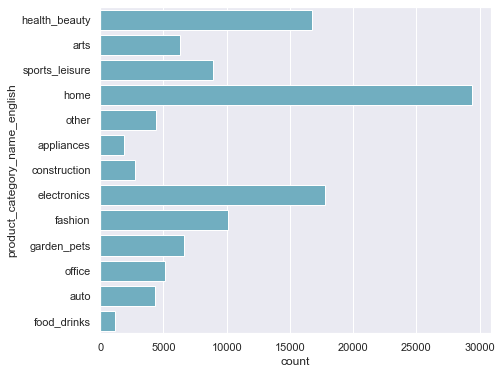

In [65]:
plt.subplots(figsize=(7, 6))
sns.countplot(y="product_category_name_english", data=payments_reviews_customers_orders_products_order_items_df, color="c")

#### Creation of a final dataframe for segmentation analysis

We will now create dummy variables from the product category values. We will create such variables per unique value from the order id.

In [66]:
print ("The number of duplicate values in the variable 'customer_unique_id' of the dataframe is: {}".format(payments_reviews_customers_orders_products_order_items_df.duplicated(subset=['customer_unique_id']).sum()))

The number of duplicate values in the variable 'customer_unique_id' of the dataframe is: 22213


In [67]:
print ("The number of duplicate values in the variable 'order_id' of the dataframe is: {}".format(payments_reviews_customers_orders_products_order_items_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the dataframe is: 19093


In [68]:
dummies_product_category_variables = payments_reviews_customers_orders_products_order_items_df.copy()

In [69]:
# See reference code: https://stackoverflow.com/questions/63636807/pandas-group-by-and-get-dummies

dummies_product_category_variables = dummies_product_category_variables.set_index('customer_unique_id')['product_category_name_english'].str.get_dummies().max(level=0).reset_index()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
dummies_product_category_variables.head()

,customer_unique_id,appliances,arts,auto,construction,electronics,fashion,food_drinks,garden_pets,health_beauty,home,office,other,sports_leisure
0,b1a1199364a4a7fe27c4486ab63f550d,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7139ee1d2ad919a82b6e68a29582264e,0,0,0,0,0,0,0,0,1,0,0,0,0
2,48d6d950c0aba132537fc335c0c56e01,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0b3dc7efaafb0cf78a4796d42fa8d74c,0,0,0,0,0,0,0,0,1,0,0,0,0
4,abd7e9db219836e58c3fca4965dd14e5,0,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
print("The number of duplicate values in the variable 'customer_unique_id' of dummies product category variables dataframe is: {}".format(dummies_product_category_variables.duplicated(subset=['customer_unique_id']).sum()))

The number of duplicate values in the variable 'customer_unique_id' of dummies product category variables dataframe is: 0


Now we will create a dataframe that is grouped per unique value of customer_unique_id.

In [72]:
payments_reviews_customers_orders_products_order_items_new_df = payments_reviews_customers_orders_products_order_items_df.copy()

In [73]:
df_for_segmentation_analysis = pd.merge(payments_reviews_customers_orders_products_order_items_new_df, dummies_product_category_variables, on='customer_unique_id')

In [74]:
df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   product_id                       115609 non-null  object 
 1   order_id                         115609 non-null  object 
 2   order_item_id                    115609 non-null  int64  
 3   seller_id                        115609 non-null  object 
 4   price                            115609 non-null  float64
 5   freight_value                    115609 non-null  float64
 6   order_total_number_of_items      115609 non-null  int64  
 7   payment_type                     115609 non-null  object 
 8   payment_value                    115609 non-null  float64
 9   review_id                        115609 non-null  object 
 10  review_score                     115609 non-null  int64  
 11  customer_id                      115609 non-null  object 
 12  cu

In [75]:
df_for_segmentation_analysis = df_for_segmentation_analysis.drop(columns=[
                                                'order_item_id',
                                                'seller_id',
                                                'price',
                                                'freight_value',
                                                'review_id',
                                                ])

In [76]:
print ("The number of duplicate values in the variable 'order_id' of the final dataframe is: {}".format(df_for_segmentation_analysis.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the final dataframe is: 19093


In [77]:
print ("The number of duplicate values in the variable 'customer_unique_id' of the final dataframe is: {}".format(df_for_segmentation_analysis.duplicated(subset=['customer_unique_id']).sum()))

The number of duplicate values in the variable 'customer_unique_id' of the final dataframe is: 22213


In [78]:
df_for_segmentation_analysis.describe()

,order_total_number_of_items,payment_value,review_score,customer_zip_code_prefix,number_of_orders_for_a_customer,appliances,arts,auto,construction,electronics,fashion,food_drinks,garden_pets,health_beauty,home,office,other,sports_leisure
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,1.389027,172.387379,4.034409,35061.537597,1.090183,0.016833,0.057556,0.039469,0.025828,0.158647,0.092060,0.011158,0.060428,0.151199,0.263889,0.046476,0.040698,0.080867
std,1.085271,265.873969,1.385584,29841.671732,0.405716,0.128644,0.232903,0.194709,0.158624,0.365348,0.289112,0.105042,0.238279,0.358245,0.440742,0.210514,0.197589,0.272633
min,1.000000,0.000000,1.000000,1003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.870000,4.000000,11310.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,108.050000,5.000000,24241.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,189.480000,5.000000,58745.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,21.000000,13664.080000,5.000000,99980.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will now create a dataframe in which we will keep the maximum number of articles and orders placed by a customer by dropping the duplicates of customer_unique_id.

In [79]:
new_df_for_segmentation_analysis = df_for_segmentation_analysis.copy()

In [80]:
new_df_for_segmentation_analysis = new_df_for_segmentation_analysis.drop_duplicates('customer_unique_id', keep='last')

In [81]:
new_df_for_segmentation_analysis.describe()

,order_total_number_of_items,payment_value,review_score,customer_zip_code_prefix,number_of_orders_for_a_customer,appliances,arts,auto,construction,electronics,fashion,food_drinks,garden_pets,health_beauty,home,office,other,sports_leisure
count,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000
mean,1.138625,158.435483,4.104726,35207.525515,1.035569,0.017388,0.060613,0.041040,0.023063,0.160403,0.094469,0.010225,0.055356,0.155842,0.234849,0.043717,0.042668,0.079950
std,0.529329,218.353242,1.330275,29811.813911,0.216802,0.130714,0.238620,0.198385,0.150105,0.366981,0.292481,0.100602,0.228674,0.362707,0.423907,0.204466,0.202108,0.271217
min,1.000000,0.000000,1.000000,1003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.190000,4.000000,11420.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,103.360000,5.000000,24445.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,175.752500,5.000000,59056.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.000000,13664.080000,5.000000,99980.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
print ("The number of duplicate values in the variable 'order_id' of the final dataframe is: {}".format(new_df_for_segmentation_analysis.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the final dataframe is: 0


In [83]:
print ("The number of duplicate values in the variable 'customer_unique_id' of the final dataframe is: {}".format(new_df_for_segmentation_analysis.duplicated(subset=['customer_unique_id']).sum()))

The number of duplicate values in the variable 'customer_unique_id' of the final dataframe is: 0


In [84]:
new_df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93396 entries, 0 to 115608
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       93396 non-null  object 
 1   order_id                         93396 non-null  object 
 2   order_total_number_of_items      93396 non-null  int64  
 3   payment_type                     93396 non-null  object 
 4   payment_value                    93396 non-null  float64
 5   review_score                     93396 non-null  int64  
 6   customer_id                      93396 non-null  object 
 7   customer_unique_id               93396 non-null  object 
 8   customer_zip_code_prefix         93396 non-null  int64  
 9   customer_city                    93396 non-null  object 
 10  customer_state                   93396 non-null  object 
 11  order_purchase_timestamp         93396 non-null  object 
 12  number_of_orders_

#### Visualization of some of the indicators

As follows, we will visualize some of the numerical variables distributions.

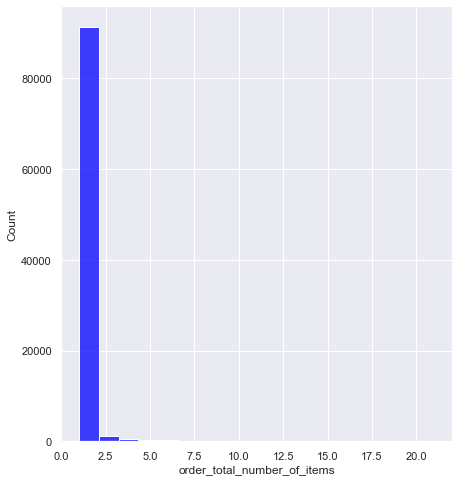

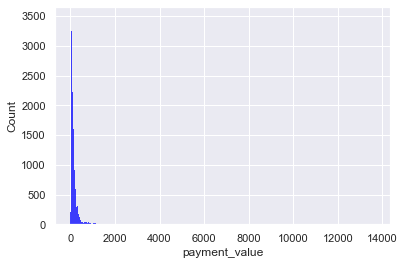

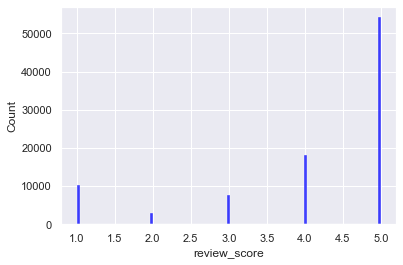

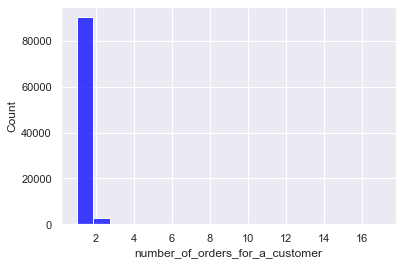

In [88]:
plt.subplots(figsize=(7, 8))

columns_histogram=['order_total_number_of_items', 'payment_value', 'review_score', 'number_of_orders_for_a_customer']

for i in new_df_for_segmentation_analysis.columns:
    if i in columns_histogram:
        sns.histplot(data=new_df_for_segmentation_analysis, x=i, color="blue")
        plt.show()

<AxesSubplot:xlabel='count', ylabel='payment_type'>

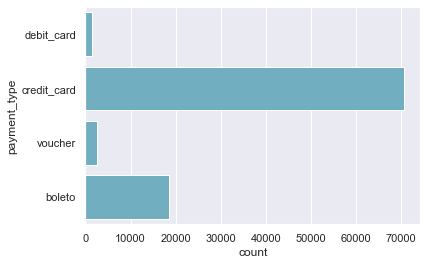

In [89]:
sns.countplot(y="payment_type", data=new_df_for_segmentation_analysis, color="c")

<AxesSubplot:xlabel='count', ylabel='customer_city'>

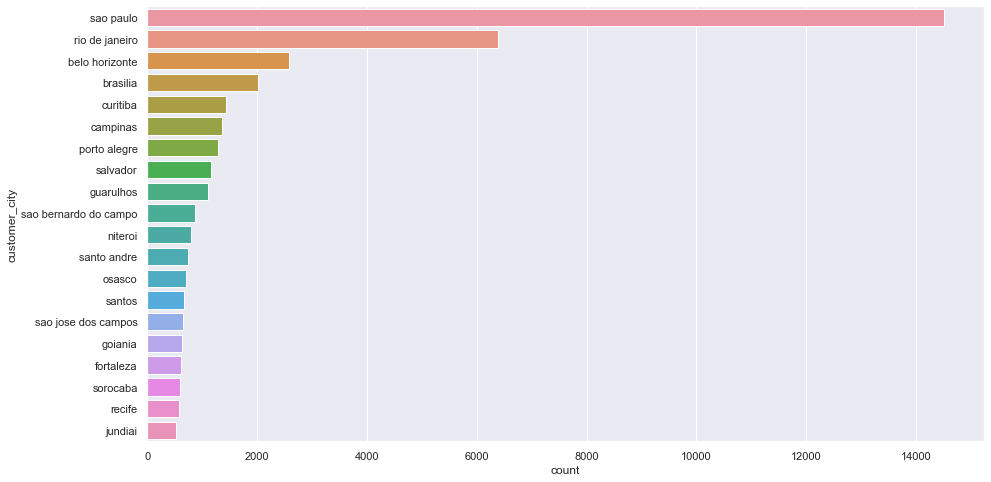

In [93]:
plt.figure(figsize=(15,8))
sns.countplot(y='customer_city', data=new_df_for_segmentation_analysis, order=new_df_for_segmentation_analysis['customer_city'].value_counts().iloc[:20].index)

<AxesSubplot:xlabel='count', ylabel='customer_state'>

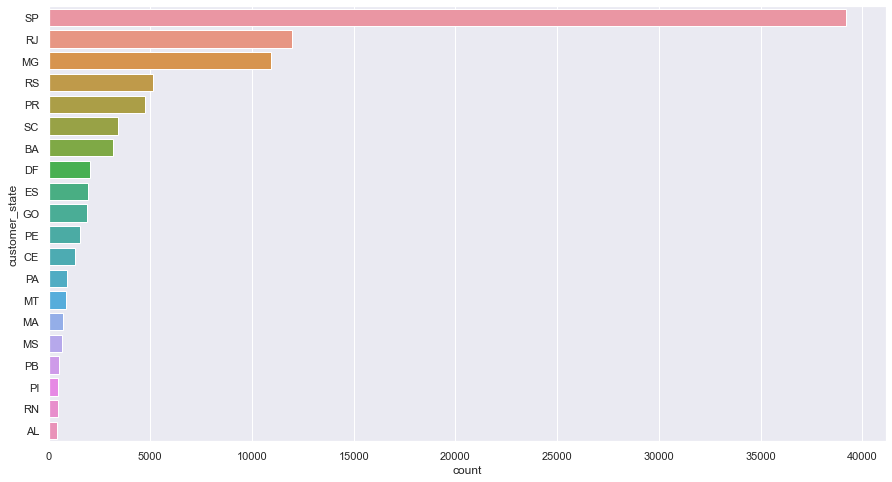

In [94]:
plt.figure(figsize=(15,8))
sns.countplot(y='customer_state', data=new_df_for_segmentation_analysis, order=new_df_for_segmentation_analysis['customer_state'].value_counts().iloc[:20].index)

In [85]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

## Use of RFM method

So far we have created a dataframe that contains the main indicators that we will use for our analysis. 

For the clients segmentation we will start by using a method called RFM, which is widely used for customer analysis in market research.

**We will use the RFM method to compare the clients segmentation with other clustering methods, such as K-means.**

**RFM** stands for the three dimensions:

* **Recency** – How recently did the customer purchase?
* **Frequency** – How often do they purchase?
* **Monetary Value** – How much do they spend?

See reference: https://en.wikipedia.org/wiki/RFM_(market_research)

To compute the **Recency**, we will compute the number of days that has been since the a customer placed an order. The **frequency**  will be refered to the number of orders that a customer placed, and the **Monetary value** is the order payment value.

### Heuristic RFM

In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

See reference: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

In the RFM method, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. This is, it depends on the company's rules. For example, a company can give more priority to the Monetary Value. This is used as a rule to compute the RFM Score. So in general, we multiply the terms R, F and M by constant a,b and c, to determine depending on the priorities of the company.

For example:

**a(Recency) + b(Frequency) + c(Monetary Value) = RFM Score**

Rating Customer based upon the RFM Score:

* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

#### Creation of RFM table

In [98]:
rfm_df =  new_df_for_segmentation_analysis.copy()

We already have the Frequence, which is the variable 'number_of_orders_for_a_customer'. Now we will compute the number of days that have past from a customer's last order placement. The monetary value is given by the variable 'payment_value'.

In [99]:
columns_for_rfm = ['order_id', 'customer_unique_id', 'number_of_orders_for_a_customer', 'order_purchase_timestamp', 'payment_value']

In [100]:
rfm_df = rfm_df[columns_for_rfm]

In [101]:
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp']).dt.date

In [102]:
recent_date = rfm_df['order_purchase_timestamp'].max()
rfm_df['Recency'] = rfm_df['order_purchase_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,order_id,customer_unique_id,number_of_orders_for_a_customer,order_purchase_timestamp,payment_value,Recency
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,1,2018-04-24,18.30,127
1,048cc42e03ca8d43c729adf6962cb348,7139ee1d2ad919a82b6e68a29582264e,1,2017-11-16,24.68,286
2,5fa78e91b5cb84b6a8ccc42733f95742,48d6d950c0aba132537fc335c0c56e01,1,2017-11-30,24.68,272
4,60762802b48bb6d256d55b013d115013,0b3dc7efaafb0cf78a4796d42fa8d74c,2,2016-10-04,263.93,694
5,7b13c77c64a9a956500cbf1a9a23798d,abd7e9db219836e58c3fca4965dd14e5,1,2018-05-17,298.48,104


In [103]:
rfm_df.rename(columns={'number_of_orders_for_a_customer': 'Frequency',
                        'payment_value': 'Monetary_value'}, inplace=True)

In [104]:
rfm_df = rfm_df.drop(columns=['order_id', 'order_purchase_timestamp'])
rfm_df.head()

,customer_unique_id,Frequency,Monetary_value,Recency
0,b1a1199364a4a7fe27c4486ab63f550d,1,18.30,127
1,7139ee1d2ad919a82b6e68a29582264e,1,24.68,286
2,48d6d950c0aba132537fc335c0c56e01,1,24.68,272
4,0b3dc7efaafb0cf78a4796d42fa8d74c,2,263.93,694
5,abd7e9db219836e58c3fca4965dd14e5,1,298.48,104


#### Ranking customers based on their Recency, Frequency, and Monetary value

We will normalize the rank of the customers to analyze the ranking.

In [105]:
# max: highest rank in the group
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary_value'].rank(ascending=True)

In [106]:
# normalizing the rank of the customers 

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())

rfm_df.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,b1a1199364a4a7fe27c4486ab63f550d,1,18.30,127,67108.0,45211.0,877.0,0.718570,0.484079,0.484079
1,7139ee1d2ad919a82b6e68a29582264e,1,24.68,286,32124.0,45211.0,2245.5,0.343973,0.484079,0.484079
2,48d6d950c0aba132537fc335c0c56e01,1,24.68,272,36672.0,45211.0,2245.5,0.392672,0.484079,0.484079
4,0b3dc7efaafb0cf78a4796d42fa8d74c,2,263.93,694,40.0,91783.5,81738.5,0.000428,0.982735,0.982735
5,abd7e9db219836e58c3fca4965dd14e5,1,298.48,104,73063.0,45211.0,83767.5,0.782334,0.484079,0.484079


In [107]:
rfm_df.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
count,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000
mean,1.035569,158.435483,238.918605,46698.500000,46698.500000,46698.500000,0.500032,0.500005,0.500005
std,0.216802,218.353242,153.395032,26961.159358,8201.023739,26961.245967,0.288691,0.087809,0.087809
min,1.000000,0.000000,0.000000,1.000000,45211.000000,1.500000,0.000011,0.484079,0.484079
25%,1.000000,60.190000,114.000000,23303.500000,45211.000000,23349.000000,0.249526,0.484079,0.484079
50%,1.000000,103.360000,219.000000,46781.500000,45211.000000,46695.000000,0.500921,0.484079,0.484079
75%,1.000000,175.752500,349.000000,70195.000000,45211.000000,70047.250000,0.751625,0.484079,0.484079
max,17.000000,13664.080000,724.000000,93391.000000,93396.000000,93396.000000,1.000000,1.000000,1.000000


#### Calculating RFM score

As we previously mentioned, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. Based on this score, we will segment the customers.

We will use the rule:

**40(Recency) + 40(Frequency) + 20(Monetary Value) = RFM Score**

Here we give equally importance to the Recency and the Frequency, this is, to those customers who recently placed orders and bought more than one product in an order. Then, we gave less importance to the Monetary value. 

In [108]:
rfm_df['RFM_Score'] = 40*rfm_df['R_rank_norm'] + 40*rfm_df['F_rank_norm'] + 20*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(0)
rfm_df.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,b1a1199364a4a7fe27c4486ab63f550d,1,18.0,127,67108.0,45211.0,877.0,1.0,0.0,0.0,3.0
1,7139ee1d2ad919a82b6e68a29582264e,1,25.0,286,32124.0,45211.0,2246.0,0.0,0.0,0.0,2.0
2,48d6d950c0aba132537fc335c0c56e01,1,25.0,272,36672.0,45211.0,2246.0,0.0,0.0,0.0,2.0
4,0b3dc7efaafb0cf78a4796d42fa8d74c,2,264.0,694,40.0,91784.0,81738.0,0.0,1.0,1.0,3.0
5,abd7e9db219836e58c3fca4965dd14e5,1,298.0,104,73063.0,45211.0,83768.0,1.0,0.0,0.0,3.0


In [109]:
rfm_df.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000,93396.000000
mean,1.035569,158.439901,238.918605,46698.500782,46698.513352,46698.507056,0.500632,0.031854,0.031854,2.499657
std,0.216802,218.354387,153.395032,26961.147447,8201.096920,26961.236469,0.500002,0.175611,0.175611,0.601415
min,1.000000,0.000000,0.000000,1.000000,45211.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,60.000000,114.000000,23304.000000,45211.000000,23349.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,103.000000,219.000000,46782.000000,45211.000000,46695.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,176.000000,349.000000,70195.000000,45211.000000,70047.250000,1.000000,0.000000,0.000000,3.000000
max,17.000000,13664.000000,724.000000,93391.000000,93396.000000,93396.000000,1.000000,1.000000,1.000000,5.000000


In [110]:
rfm_df = rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank', 'R_rank_norm', 'F_rank_norm', 'M_rank_norm'])
# rfm_df.describe()

In [111]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] == 5, "Top customer",
                            (np.where(rfm_df['RFM_Score'] == 4, "High value customer",
                            (np.where(rfm_df['RFM_Score'] == 3, "Medium value customer",
                             np.where(rfm_df['RFM_Score'] > 1.5, 'Low value customer', 'Lost customer'))))))
rfm_df.head()

,customer_unique_id,Frequency,Monetary_value,Recency,RFM_Score,Customer_segment
0,b1a1199364a4a7fe27c4486ab63f550d,1,18.0,127,3.0,Medium value customer
1,7139ee1d2ad919a82b6e68a29582264e,1,25.0,286,2.0,Low value customer
2,48d6d950c0aba132537fc335c0c56e01,1,25.0,272,2.0,Low value customer
4,0b3dc7efaafb0cf78a4796d42fa8d74c,2,264.0,694,3.0,Medium value customer
5,abd7e9db219836e58c3fca4965dd14e5,1,298.0,104,3.0,Medium value customer


* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

#### Visualizing the customer segments

We will use a pie plot to display all segments of customers.

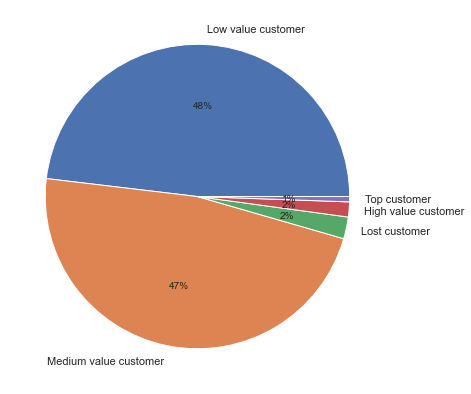

In [112]:
plt.subplots(figsize=(7,7))
plt.pie(rfm_df.Customer_segment.value_counts(), labels=rfm_df.Customer_segment.value_counts().index, autopct='%.0f%%')
plt.show()

## K-Means segmentation

In [ ]:
break

In [ ]:
segmentation_k_means_df = final_df_for_segmentation_analysis.copy()

In [ ]:
# segmentation_k_means_df.info()

In [ ]:
segmentation_k_means_df = segmentation_k_means_df.drop(columns=['product_id',
                                                                'order_id',
                                                                'order_item_id',
                                                                'seller_id',
                                                                'price',
                                                                'freight_value',
                                                                'review_id',
                                                                'customer_id',
                                                                'customer_unique_id'])

In [ ]:
segmentation_k_means_df.info()

### Transformation of categorical variables into numerical values

In [ ]:
categorical_columns = ['payment_type', 'customer_city', 'customer_state', 'order_purchase_timestamp', 'product_category_name_english']

In [ ]:
segmentation_k_means_new_df_transformed_all_numerical = segmentation_k_means_df.copy()

In [ ]:
segmentation_k_means_new_df_transformed_all_numerical = segmentation_k_means_new_df_transformed_all_numerical.astype({'payment_type': 'category', 
                                                        'customer_city': 'category', 
                                                        'customer_state': 'category',
                                                        'order_purchase_timestamp': 'category',
                                                        'product_category_name_english': 'category'})

columns_to_categorical = segmentation_k_means_new_df_transformed_all_numerical.select_dtypes(['category']).columns
segmentation_k_means_new_df_transformed_all_numerical[columns_to_categorical] = segmentation_k_means_new_df_transformed_all_numerical[columns_to_categorical].apply(lambda x: x.cat.codes)

We have now data without missing values and we have transformed our categorical variables into numerical.

In [ ]:
segmentation_k_means_new_df_transformed_all_numerical.describe()

### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
# plt.subplots(figsize=(7, 8))
# for i in segmentation_k_means_new_df_transformed_all_numerical.columns:
#     sns.histplot(data = segmentation_k_means_new_df_transformed_all_numerical, x=i, color="blue")
#     plt.show()

In [ ]:
df_log_transformed = segmentation_k_means_new_df_transformed_all_numerical.copy()

In [ ]:
columns_for_log_transformation = ['order_total_number_of_items',
                                    'payment_value', 
                                    'review_score', 
                                    'customer_zip_code_prefix'
                                    ]

In [ ]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

In [ ]:
df_log_transformed.describe()
plt.subplots(figsize=(7, 8))
for i in df_log_transformed.columns:
    sns.histplot(data=df_log_transformed, x=i, color="blue")
    plt.show()

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [ ]:
df_for_z_scores = df_log_transformed.copy()

In [ ]:
# columns_for_z_scores = ['order_total_number_of_items',
#                                     'payment_type',
#                                     'payment_value', 
#                                     'review_score', 
#                                     'customer_zip_code_prefix',
#                                     'customer_city',
#                                     'customer_state',
#                                     'order_purchase_timestamp',
#                                     'product_category_name_english'
#                                     ]

In [ ]:
# standardize data
df_standardized = (df_for_z_scores - df_for_z_scores.mean()) / df_for_z_scores.std()

In [ ]:
# df_standardized.describe()
# plt.subplots(figsize=(7, 8))
# for i in df_standardized.columns:
#     sns.histplot(data=df_standardized, x=i, color="blue")
#     plt.show()

In [ ]:
df_standardized_without_outliers = df_standardized.loc[
                                                    (df_standardized['order_total_number_of_items'] >= -4) & (df_standardized['order_total_number_of_items'] <= 4)
                                                    & (df_standardized['payment_value'] >= -4) & (df_standardized['payment_value'] <= 4)
                                                    & (df_standardized['appliances'] >= -4) & (df_standardized['appliances'] <= 4)
                                                    & (df_standardized['construction'] >= -4) & (df_standardized['construction'] <= 4)
                                                    & (df_standardized['food_drinks'] >= -4) & (df_standardized['food_drinks'] <= 4)
                                                    ]

In [ ]:
plt.subplots(figsize=(7, 8))
for i in df_standardized_without_outliers.columns:
    sns.histplot(data = df_standardized_without_outliers, x=i, color="blue")
    plt.show()

In [ ]:
df_standardized_without_outliers.info()

### Elbow method: determining the best K number of clusters

Visualization of the elbow method of our K-Means.

See reference: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X = df_standardized_without_outliers.copy()

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.subplots(figsize=(15, 9))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()